# Importing Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
df = pd.read_csv('garment_workers_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df.shape

(1197, 15)

In [4]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


# Data Preprocessing


In [5]:
df2 = df.drop(['date', 'day'], axis=1)

In [6]:
df2.shape

(1197, 13)

### Handing Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [8]:
df2.isnull().sum()

quarter                    0
department                 0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [9]:
df3 = df2.fillna({
        'wip': 0,
        })

In [10]:
df3.isnull().sum()

quarter                  0
department               0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

# Outliers Detection and Removal

### Outliers Detection 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'team'),
  Text(1, 0, 'targeted_productivity'),
  Text(2, 0, 'smv'),
  Text(3, 0, 'wip'),
  Text(4, 0, 'over_time'),
  Text(5, 0, 'incentive'),
  Text(6, 0, 'idle_time'),
  Text(7, 0, 'idle_men'),
  Text(8, 0, 'no_of_style_change'),
  Text(9, 0, 'no_of_workers'),
  Text(10, 0, 'actual_productivity')])

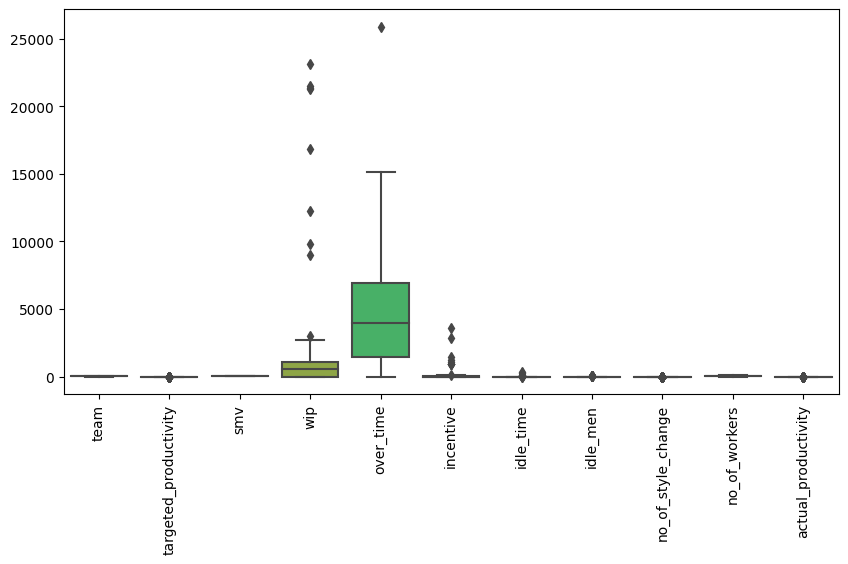

In [11]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df3, orient ='v',width=0.8)
plt.xticks(rotation=90)

### Removing Outliers for 'incentive' column

In [12]:
Q1 = df3.incentive.quantile(0.25)
Q3 = df3.incentive.quantile(0.75)
Q1, Q3

(0.0, 50.0)

In [13]:
IQR = Q3 - Q1
IQR

50.0

In [14]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-75.0, 125.0)

In [15]:
df3[(df3.incentive<lower_limit)|(df3.incentive>upper_limit)]

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
730,Quarter2,sweing,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
1128,Quarter2,finishing,11,0.80,2.90,0.0,0,960,0.0,0,0,8.0,0.960625
1129,Quarter2,finishing,12,0.80,4.60,0.0,0,1080,0.0,0,0,9.0,0.902963
1130,Quarter2,finishing,5,0.60,3.94,0.0,0,2880,0.0,0,0,12.0,0.864343
1133,Quarter2,finishing,9,0.75,2.90,0.0,0,3600,0.0,0,0,15.0,0.841000
1137,Quarter2,finishing,3,0.80,4.60,0.0,0,1440,0.0,0,0,12.0,0.795417
1138,Quarter2,finishing,4,0.75,3.94,0.0,0,960,0.0,0,0,8.0,0.795388
1139,Quarter2,finishing,1,0.75,3.94,0.0,0,960,0.0,0,0,8.0,0.794567
1143,Quarter2,finishing,2,0.70,3.90,0.0,0,1200,0.0,0,0,10.0,0.682500
1148,Quarter2,finishing,10,0.70,2.90,0.0,0,960,0.0,0,0,8.0,0.477292


In [16]:
df4 = df3[(df3.incentive>lower_limit)&(df3.incentive<upper_limit)]

In [17]:
df4.shape

(1186, 13)

### Removing Outliers for 'wip' column

In [18]:
Q1 = df4.wip.quantile(0.25)
Q3 = df4.wip.quantile(0.75)
Q1, Q3

(0.0, 1084.75)

In [19]:
IQR = Q3 - Q1
IQR

1084.75

In [20]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1627.125, 2711.875)

In [21]:
df4[(df4.wip<lower_limit)|(df4.wip>upper_limit)]

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
561,Quarter1,sweing,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
563,Quarter1,sweing,2,0.80,22.52,21385.0,7020,88,0.0,0,0,58.5,0.900158
564,Quarter1,sweing,3,0.80,22.52,21266.0,6840,70,0.0,0,0,57.0,0.900142
565,Quarter1,sweing,10,0.80,22.52,21540.0,6720,88,0.0,0,0,56.0,0.900130
568,Quarter1,sweing,12,0.80,15.26,12261.0,3600,63,0.0,0,0,35.0,0.800402
569,Quarter1,sweing,4,0.80,22.52,23122.0,5940,50,0.0,0,0,56.5,0.800393
570,Quarter1,sweing,9,0.75,29.12,8992.0,6960,55,0.0,0,0,58.0,0.799963
572,Quarter1,sweing,11,0.70,20.55,9792.0,6480,60,0.0,0,0,54.0,0.700398
573,Quarter1,sweing,6,0.70,18.79,2984.0,3960,30,0.0,0,0,33.0,0.700355


In [22]:
df5 = df4[(df4.wip>lower_limit)&(df4.wip<upper_limit)]

In [23]:
df5.shape

(1177, 13)

### Removing Outliers for 'over_time' column

In [24]:
Q1 = df5.over_time.quantile(0.25)
Q3 = df5.over_time.quantile(0.75)
Q1, Q3

(1440.0, 6960.0)

In [25]:
IQR = Q3 - Q1
IQR

5520.0

In [26]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-6840.0, 15240.0)

In [27]:
df5[(df5.over_time<lower_limit)|(df5.over_time>upper_limit)]

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
146,Quarter2,sweing,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951


In [28]:
df6 = df5[(df5.over_time>lower_limit)&(df5.over_time<upper_limit)]

In [29]:
df6.shape

(1176, 13)

### Plotting after removing Outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'team'),
  Text(1, 0, 'targeted_productivity'),
  Text(2, 0, 'smv'),
  Text(3, 0, 'wip'),
  Text(4, 0, 'over_time'),
  Text(5, 0, 'incentive'),
  Text(6, 0, 'idle_time'),
  Text(7, 0, 'idle_men'),
  Text(8, 0, 'no_of_style_change'),
  Text(9, 0, 'no_of_workers'),
  Text(10, 0, 'actual_productivity')])

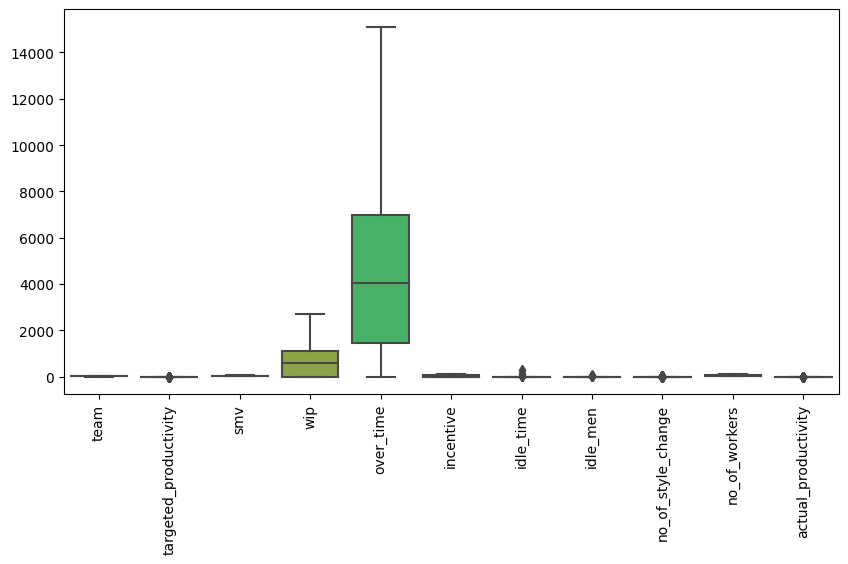

In [30]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df6, orient ='v',width=0.8)
plt.xticks(rotation=90)

# Encoding & Scaling

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
for i in range(0, df6.shape[1]):
    if df6.dtypes[i] == 'object':
        df6.loc[:, df6.columns[i]] = le.fit_transform(df6.loc[:, df6.columns[i]])

In [33]:
df6.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,2,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,1,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,2,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,2,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [34]:
x = df6.drop(['actual_productivity'], axis=1)
y = df6.actual_productivity

In [35]:
x.shape, y.shape

((1176, 12), (1176,))

In [36]:
y.head()

0    0.940725
1    0.886500
2    0.800570
3    0.800570
4    0.800382
Name: actual_productivity, dtype: float64

In [37]:
#Standarization
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
x.iloc[:,:] = scaler.fit_transform(x.iloc[:,:])

In [40]:
x.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,-1.160117,0.780739,0.455616,0.720481,1.008608,0.926217,0.760786,2.413020,-0.057985,-0.114022,-0.355135,1.097504
1,-1.160117,-0.468444,-1.571751,0.209020,-1.018120,-1.019391,-1.102067,-0.847073,-0.057985,-0.114022,-0.355135,-1.201499
2,-1.160117,0.780739,1.324487,0.720481,-0.336767,0.680382,-0.280220,0.816240,-0.057985,-0.114022,-0.355135,-0.187233
3,-1.160117,0.780739,1.614110,0.720481,-0.336767,0.680382,-0.280220,0.816240,-0.057985,-0.114022,-0.355135,-0.187233
4,-1.160117,0.780739,-0.123632,0.720481,0.984893,1.035087,-0.809855,0.816240,-0.057985,-0.114022,-0.355135,0.962269


# Exploratory Data Analysis

### Descriptive Analysis

In [41]:
df.describe(include="all")

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3/11/2015,Quarter1,sweing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,NaN,NaN,NaN,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,NaN,NaN,NaN,NaN,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,NaN,NaN,NaN,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,NaN,NaN,NaN,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,NaN,NaN,NaN,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


### Univariate Analysis

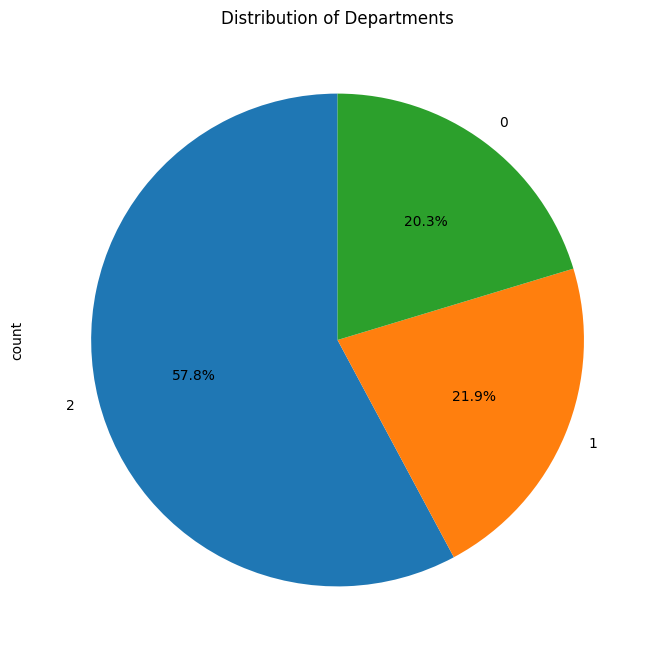

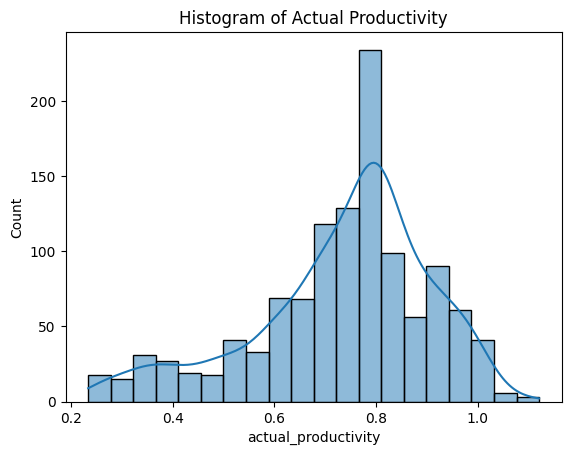

count    1176.000000
mean        0.734331
std         0.173952
min         0.233705
25%         0.650243
50%         0.769070
75%         0.850173
max         1.120437
Name: actual_productivity, dtype: float64


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis using a pie chart
plt.figure(figsize=(8, 8))
df6['department'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Departments')
plt.show()

# Univariate analysis using a histogram
sns.histplot(df6['actual_productivity'], bins=20, kde=True)
plt.title('Histogram of Actual Productivity')
plt.show()

# Descriptive statistics
print(df6['actual_productivity'].describe())


### Bivariate Analysis

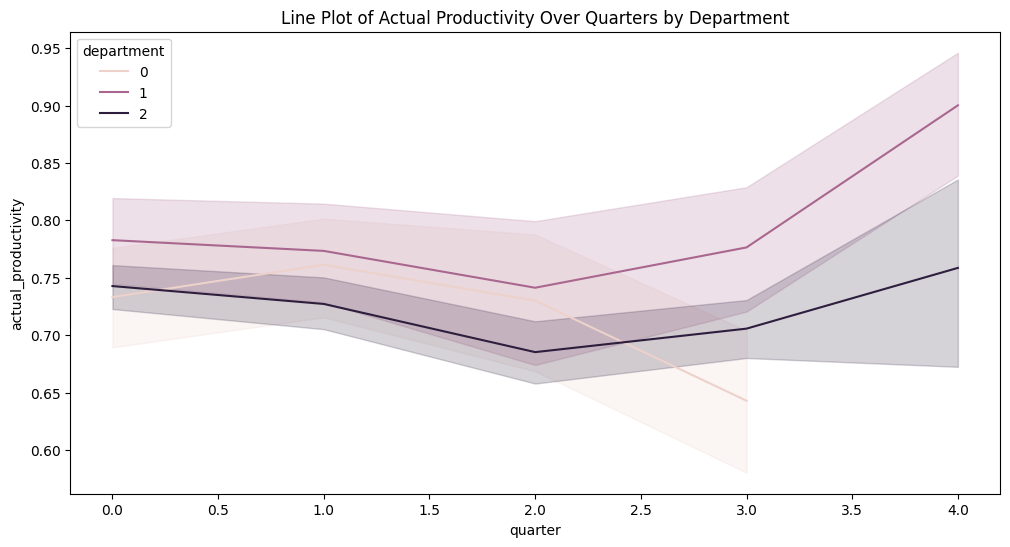

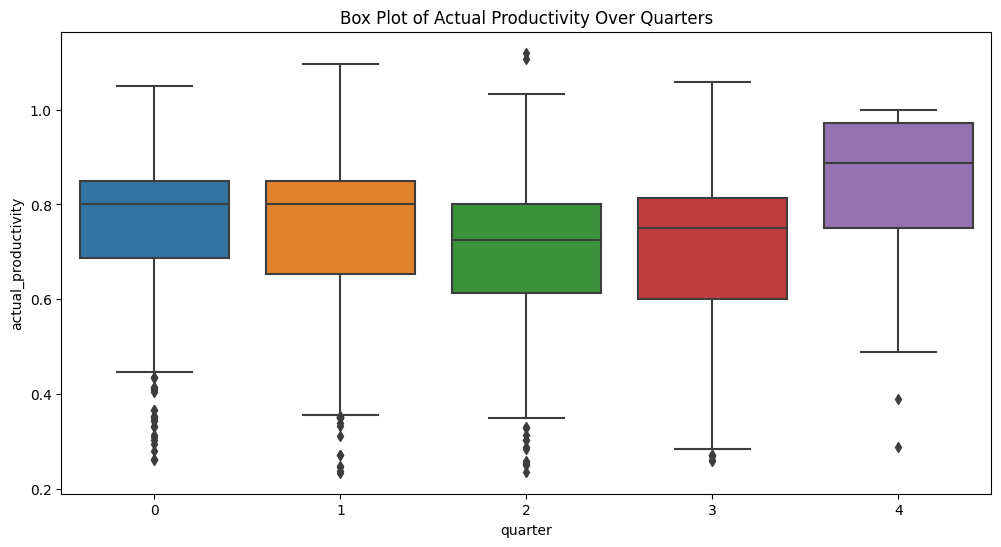

In [43]:
# Bivariate analysis using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='quarter', y='actual_productivity', data=df6, hue='department')
plt.title('Line Plot of Actual Productivity Over Quarters by Department')
plt.show()

# Bivariate analysis using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='quarter', y='actual_productivity', data=df6)
plt.title('Box Plot of Actual Productivity Over Quarters')
plt.show()




### Multivariate analysis

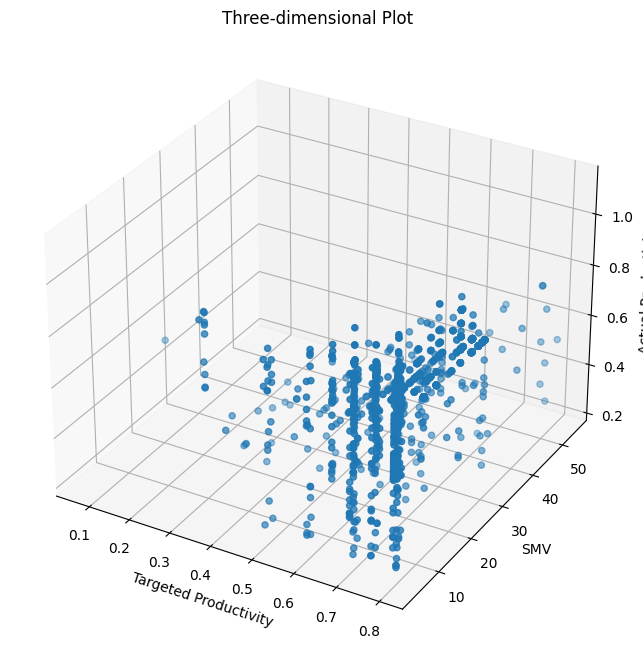

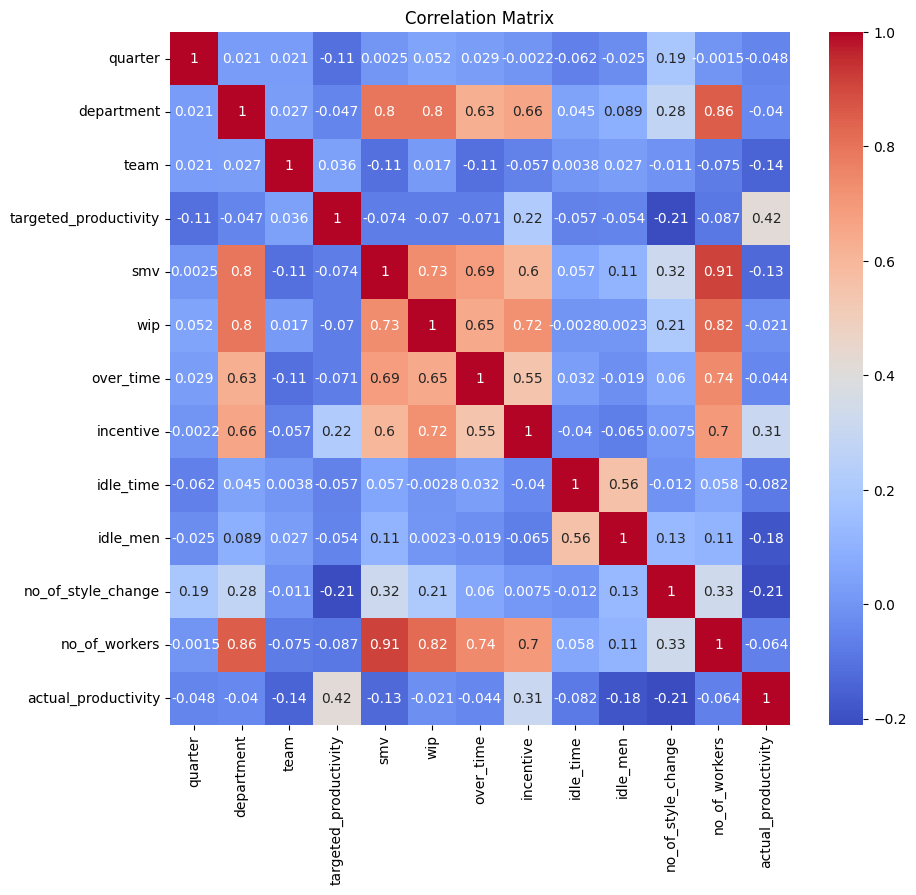

In [44]:
# Multivariate analysis using a three-dimensional plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df6['targeted_productivity'], df6['smv'], df6['actual_productivity'])
ax.set_xlabel('Targeted Productivity')
ax.set_ylabel('SMV')
ax.set_zlabel('Actual Productivity')
ax.set_title('Three-dimensional Plot')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 9))
correlation_matrix = df6.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Train Test Split

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 12)
(353, 12)
(823,)
(353,)


# Model Building

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Disable the FutureWarning about base_estimator in BaggingRegressor
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.ensemble._base")


# Assuming X contains the features and y contains the target variable 'actual_productivity'
X = df6.drop('actual_productivity', axis=1)
y = df6['actual_productivity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, y_test are your training and testing sets

# Define the model
rf_model = RandomForestRegressor()

# Define the hyperparameters to tune
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Use the best model for predictions
best_rf_model = random_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Best Hyperparameters:", best_params)
print("Test RMSE with Best Model:", test_rmse)


Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Test RMSE with Best Model: 0.11310060848894805


In [60]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [61]:
# Bagging Regressor
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42), random_state=42)
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                 random_state=42)

In [62]:
# AdaBoost Regressor
adaboost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)
adaboost_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)

# Performance Testing

In [67]:
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmse(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Assuming you have already trained the models (linear_model, dt_model, rf_model, etc.)

# Calculate training and testing RMSE for each model
models = [lr_model, dt_model, best_rf_model, gb_model, bagging_model, adaboost_model]
for model in models:
    training_rmse = calculate_rmse(model, X_train, y_train)
    testing_rmse = calculate_rmse(model, X_test, y_test)

    print(f"Model: {model.__class__.__name__}")
    print(f"Training RMSE: {training_rmse}")
    print(f"Testing RMSE: {testing_rmse}")
    print("\n")


Model: LinearRegression
Training RMSE: 0.1407011819804832
Testing RMSE: 0.13083482822830603


Model: DecisionTreeRegressor
Training RMSE: 0.047160676328553114
Testing RMSE: 0.1433087250101286


Model: RandomForestRegressor
Training RMSE: 0.0768636695445268
Testing RMSE: 0.11310060848894805


Model: GradientBoostingRegressor
Training RMSE: 0.10282959042051591
Testing RMSE: 0.11202004224041091


Model: BaggingRegressor
Training RMSE: 0.06652112234015904
Testing RMSE: 0.12441021614941541


Model: AdaBoostRegressor
Training RMSE: 0.05255873478298113
Testing RMSE: 0.1278236391140091




## Comparing Models

In [66]:
import pandas as pd

# Assuming you have already calculated the training and testing RMSE for each model
results = []

models = [lr_model, dt_model, best_rf_model, gb_model, bagging_model, adaboost_model]
for model in models:
    training_rmse = calculate_rmse(model, X_train, y_train)
    testing_rmse = calculate_rmse(model, X_test, y_test)

    results.append({
        'Model': model.__class__.__name__,
        'Training_RMSE': training_rmse,
        'Testing_RMSE': testing_rmse
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                       Model  Training_RMSE  Testing_RMSE
0           LinearRegression       0.140701      0.130835
1      DecisionTreeRegressor       0.047161      0.143309
2      RandomForestRegressor       0.076864      0.113101
3  GradientBoostingRegressor       0.102830      0.112020
4           BaggingRegressor       0.066521      0.124410
5          AdaBoostRegressor       0.052559      0.127824


## Summery of Evaluation Metrics

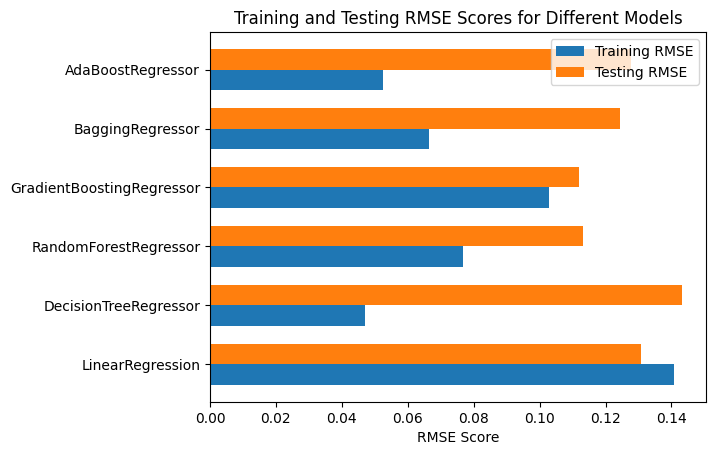

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the 'results_df' DataFrame from the previous code snippet

# Set the positions and width for the bars
positions = np.arange(len(results_df))
bar_width = 0.35

# Create the bar graph
fig, ax = plt.subplots()
training_bars = ax.barh(positions - bar_width / 2, results_df['Training_RMSE'], bar_width, label='Training RMSE')
testing_bars = ax.barh(positions + bar_width / 2, results_df['Testing_RMSE'], bar_width, label='Testing RMSE')

# Set labels, title, and legend
ax.set_yticks(positions)
ax.set_yticklabels(results_df['Model'])
ax.set_xlabel('RMSE Score')
ax.set_title('Training and Testing RMSE Scores for Different Models')
ax.legend()

# Show the plot
plt.show()


# Saving files

In [69]:
import joblib

# Assuming best_rf_model is your trained Random Forest model
best_rf_model = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150)

# Fit the model to your entire dataset before saving
best_rf_model.fit(X, y)

# Save the model to a file
joblib.dump(best_rf_model, 'random_forest_model.joblib')


['random_forest_model.joblib']

# Regression model metrics

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_true = [2.5, 3.0, 4.2, 5.1, 2.8]  
y_pred = [2.3, 2.8, 4.0, 5.0, 3.0]  
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


MAE: 0.18000000000000008
MSE: 0.034000000000000044
RMSE: 0.18439088914585786
R2 Score: 0.9644945697577276


# Classification model metrics

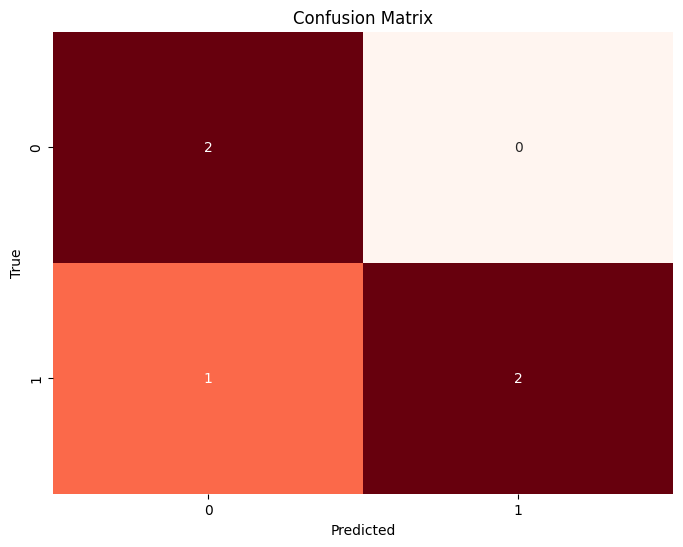

Accuracy: 0.8


NameError: name 'classification_report' is not defined

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Assuming y_true_class and y_pred_class are your true and predicted class labels
# Replace these lists with your actual class labels
y_true_class = [0, 1, 1, 0, 1]
y_pred_class = [0, 1, 0, 0, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_class, y_pred_class)

# Accuracy Score
accuracy = accuracy_score(y_true_class, y_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print the accuracy
print(f"Accuracy: {accuracy}")

# Classification Report
class_report = classification_report(y_true_class, y_pred_class)

# Print the classification report
print("\nClassification Report:")
print(class_report)

# Testing Data with Unknown input

In [203]:
import numpy as np
# Input data for prediction
test_data = {
    'quarter': 0,
    'department': 0,
    'day': 2,
    'team': 8,
    'targeted_productivity': 0.80,
    'standard_minute_value': 26.16,
    'work_in_progress': 1108,
    'over_time': 7080,
    'incentive': 98,
    'idle_men': 0,
    'no_of_style_change': 0,
    'no_of_workers': 59
}

# Reshape the input data to a 2D array
test_data_2d = np.array(list(test_data.values())).reshape(1, -1)

# Making predictions using the trained KNeighborsRegressor model
predicted_production = best_rf_model.predict(test_data_2d)

# Printing the predicted production
print(f"Actual Production will be: {predicted_production}")

#[lr_model, dt_model, rf_model, gb_model, bagging_model, adaboost_model


Actual Production will be: [0.95160969]


C:\Users\chait\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
